<a href="https://colab.research.google.com/github/Jordasti/Especializa-o/blob/main/Atividade%20de%20aprofundamento%20trilha%206%20-%20BIG%20-%20Jordasti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5** 
## CASO: Clustering, Segmentando Países pela Força de Trabalho 
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [175]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [176]:
# Verificando o numero de linhas e colunas do conjunto dedados
df.shape

(26, 10)

In [177]:
# Verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  26 non-null     object 
 1   Agr      26 non-null     float64
 2   Min      26 non-null     float64
 3   Man      26 non-null     float64
 4   PS       26 non-null     float64
 5   Con      26 non-null     float64
 6   SI       26 non-null     float64
 7   Fin      26 non-null     float64
 8   SPS      26 non-null     float64
 9   TC       26 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.2+ KB


In [178]:
# Verificando valores nulos no conjunto de dados
df.isnull().sum()

Country    0
Agr        0
Min        0
Man        0
PS         0
Con        0
SI         0
Fin        0
SPS        0
TC         0
dtype: int64

In [179]:
# Verificando os dados
df.describe()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [180]:
from sklearn.preprocessing import StandardScaler

# Não removerei a coluna Country, a transformarei no indice
df = df.set_index('Country')

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicanaod o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



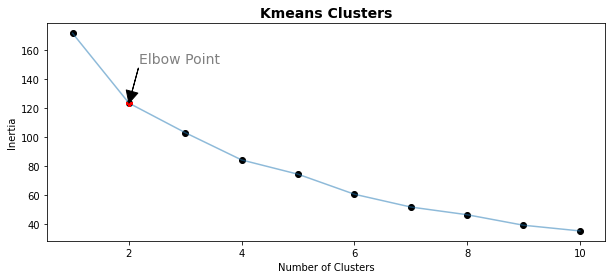

In [181]:
from sklearn.cluster import KMeans
def inercia (X=X, kmin=2, kmax=10):
  inertia = []
  for n in range(kmin, kmax+1):
    clf = KMeans(n_clusters = n, random_state= 1234)
    clf.fit(X)
    inertia.append(clf.inertia_)

  plt.figure(figsize = (10,4))
  plt.plot(np.arange(1,11), inertia, 'ko')
  plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
  plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
  plt.title('Kmeans Clusters', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,2,11)
plt.plot(2, inertia[1], 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (2, inertia[1]),
              xytext=(10,40), fontsize=14,
              textcoords='offset points',
              color='grey', arrowprops=dict(facecolor='black', width=0.1))
plt.show()

In [182]:
from sklearn.cluster import KMeans
from sklearn import metrics

for cluster in range(2,11): 
    clf = KMeans(n_clusters = cluster, random_state= 1234)
    clf.fit(X) 
    labels = clf.labels_
    print('Silhueta média para', cluster, 'clusters:', np.round(metrics.silhouette_score(X, labels), 3))

Silhueta média para 2 clusters: 0.323
Silhueta média para 3 clusters: 0.278
Silhueta média para 4 clusters: 0.231
Silhueta média para 5 clusters: 0.202
Silhueta média para 6 clusters: 0.164
Silhueta média para 7 clusters: 0.2
Silhueta média para 8 clusters: 0.194
Silhueta média para 9 clusters: 0.182
Silhueta média para 10 clusters: 0.181


(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados. 

In [183]:
# esquema ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score


for n in range(2,11):
  clf = AgglomerativeClustering(n_clusters=n, linkage='ward')
  clf.fit(X)
  labels = clf.labels_
  print(labels)
  media_silhueta = silhouette_score(X, labels)
  print(media_silhueta)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
0.45628411877541164
[2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 1 0 0 0 0 0 0 0 1]
0.2444034646182378
[2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 0 1 3 3 3 1 1 1 0]
0.2505096666792621
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 4 1 3 3 3 1 1 1 2]
0.2415785644843798
[1 1 1 2 1 2 2 1 1 1 1 0 1 0 0 1 2 4 0 3 3 3 0 0 0 5]
0.17892619147932914
[0 0 0 6 0 6 6 0 0 0 0 1 0 1 1 0 6 4 2 3 3 3 2 2 2 5]
0.1874661082914892
[1 1 1 6 7 6 6 1 7 7 7 0 1 0 0 1 6 4 2 3 3 3 2 2 2 5]
0.17474530657661275
[1 1 1 2 7 2 2 1 7 7 7 6 1 6 8 1 2 4 0 3 3 3 0 0 0 5]
0.18001792859747587
[1 1 1 0 7 0 0 1 7 7 7 6 1 6 8 1 0 9 2 3 3 3 2 2 4 5]
0.17833543773752897


In [184]:
# esquema complete
from sklearn.cluster import AgglomerativeClustering

for n in range(2,11):
  clf = AgglomerativeClustering(n_clusters=n, linkage='complete')
  clf.fit(X)
  labels = clf.labels_
  print(labels)
  media_silhueta = silhouette_score(X, labels)
  print(media_silhueta)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
0.45628411877541164
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 2 0 0 0 1]
0.22650355747606257
[3 3 3 1 3 1 1 3 3 3 3 1 3 1 1 3 1 0 1 2 2 2 1 1 1 0]
0.20574356577767894
[1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 4 0 2 2 2 0 0 0 3]
0.1925679650869275
[1 1 1 0 1 0 0 1 1 1 1 2 1 2 0 1 0 4 2 5 5 5 2 2 2 3]
0.20669960034832277
[1 1 1 2 1 2 2 1 1 1 1 0 1 0 6 1 2 4 0 5 5 5 0 0 0 3]
0.18694928076675185
[0 0 0 2 0 2 2 0 0 0 0 1 0 1 6 0 2 4 1 5 5 5 1 1 7 3]
0.17387818733003885
[2 2 2 0 3 0 0 2 3 3 3 1 2 1 6 2 0 4 1 5 5 5 1 1 7 8]
0.160628628264224
[2 2 2 1 3 1 9 2 3 3 3 0 2 0 6 2 1 4 0 5 5 5 0 0 7 8]
0.15160115193976537


In [185]:
# esquema single
from sklearn.cluster import AgglomerativeClustering

for n in range(2,11): 
  clf = AgglomerativeClustering(n_clusters=n, linkage='single') 
  clf.fit(X)
  labels = clf.labels_
  print(labels)
  media_silhueta = silhouette_score(X, labels)
  print(media_silhueta)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
0.4607323596885198
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
0.3883204419619063
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 2]
0.13372548957223512
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 4 1 1 1 1 1 1 1 2]
0.21129406158943048
[2 2 2 2 2 2 4 2 2 2 2 2 2 2 3 2 2 1 0 0 0 0 0 0 0 5]
0.12846081922827107
[2 2 2 2 2 2 4 2 2 2 2 2 2 2 3 2 2 1 0 0 0 0 0 0 6 5]
0.10100205257975982
[0 0 0 0 0 0 4 0 0 0 0 0 0 0 7 0 0 3 1 1 1 5 1 1 6 2]
0.08577247007571913
[0 0 0 0 0 3 4 0 0 0 0 3 0 3 7 0 0 8 1 1 1 5 1 1 6 2]
0.12616031465198377
[0 0 0 0 0 3 9 0 0 0 0 3 4 3 7 0 0 8 1 1 1 5 1 1 6 2]
0.05644169156558999


## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma *solução*. 

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



In [186]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 3)
clf.fit(X) 
labels = clf.labels_
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 1 1 1 1 1 1 2]


## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 

(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



In [187]:
from sklearn.cluster import KMeans
 
clf = KMeans(n_clusters = 3, random_state= 1234)
clf.fit(X) 
labels = clf.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 2 2 2 2 2 2 0]


In [188]:
df['Cluster'] = labels
df = df.sort_values(by='Cluster')
df.head(26)

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
Country,,,,,,,,,,
Yugoslavia,48.7,1.5,16.8,1.1,4.9,6.4,11.3,5.3,4.0,0
Turkey,66.8,0.7,7.9,0.1,2.8,5.2,1.1,11.9,3.2,0
Greece,41.4,0.6,17.6,0.6,8.1,11.5,2.4,11.0,6.7,0
Switzerland,7.7,0.2,37.8,0.8,9.5,17.5,5.3,15.4,5.7,1
Sweden,6.1,0.4,25.9,0.8,7.2,14.4,6.0,32.4,6.8,1
Spain,22.9,0.8,28.5,0.7,11.5,9.7,8.5,11.8,5.5,1
Portugal,27.8,0.3,24.5,0.6,8.4,13.3,2.7,16.7,5.7,1
Finland,13.0,0.4,25.9,1.3,7.4,14.7,5.5,24.3,7.6,1
Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0,1


In [189]:
df_Q4 = df[(df['Cluster'] == 0)]
media = df_Q4['Agr'].mean()
lista = []
for p in df_Q4.index:
  lista.append(p)
print(f'O percentual médio da força de trabalho empregada na agricultura do grupo é de {round(media,2)}')
print(f' E os paises são {lista}.')

O percentual médio da força de trabalho empregada na agricultura do grupo é de 52.3
 E os paises são ['Yugoslavia', 'Turkey', 'Greece'].


In [190]:
df_Q5_1 = df.groupby('Cluster').mean()
df_Q5_1.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,52.300000,0.933333,14.100000,0.600000,5.266667,7.700000,4.933333,9.400000,4.633333
1,11.562500,0.812500,27.481250,0.918750,8.612500,16.031250,5.175000,22.850000,6.562500
2,22.214286,2.400000,31.457143,1.014286,8.385714,8.185714,0.914286,18.114286,7.328571


In [191]:
df_Q5_2 = df.groupby('Cluster').sum()
df_Q5_2.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,156.9,2.8,42.3,1.8,15.8,23.1,14.8,28.2,13.9
1,185.0,13.0,439.7,14.7,137.8,256.5,82.8,365.6,105.0
2,155.5,16.8,220.2,7.1,58.7,57.3,6.4,126.8,51.3


Caminho Github: https://github.com/Jordasti/Especializa-o/blob/main/Atividade%20de%20aprofundamento%20trilha%206%20-%20BIG%20-%20Jordasti.ipynb